In [4]:
import pandas as pd
df = pd.read_csv('/content/customer_support_tickets.csv')

In [5]:

print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
df.info()
df.describe(include='all')


Dataset shape: (8469, 17)

Column names: ['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age', 'Customer Gender', 'Product Purchased', 'Date of Purchase', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   obje

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
count,8469.000000,8469,8469,8469.000000,8469,8469,8469,8469,8469,8469,8469,2769,8469,8469,5650,2769,2769.000000
unique,NaN,8028,8320,NaN,3,42,730,5,16,8077,3,2769,4,4,5470,2728,NaN
top,NaN,Michael Garcia,bsmith@example.com,NaN,Male,Canon EOS,2020-10-21,Refund request,Refund request,I'm having an issue with the {product_purchase...,Pending Customer Response,We seat culture plan.,Medium,Email,2023-06-01 20:45:39,2023-06-01 17:14:42,NaN
freq,NaN,5,4,NaN,2896,240,24,1752,576,25,2881,1,2192,2143,3,3,NaN
mean,4235.000000,NaN,NaN,44.026804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.991333
std,2444.934048,NaN,NaN,15.296112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.407016
min,1.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2118.000000,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
50%,4235.000000,NaN,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
75%,6352.000000,NaN,NaN,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


In [6]:
import nltk
import string
import re
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    filtered_words = [w for w in tokens if w not in stop_words]
    return ' '.join(filtered_words)

df['cleaned_text'] = df['Ticket Description'].apply(clean_text)
df[['Ticket Description', 'cleaned_text']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Ticket Description,cleaned_text
0,I'm having an issue with the {product_purchase...,im issue productpurchased please assist billin...
1,I'm having an issue with the {product_purchase...,im issue productpurchased please assist need c...
2,I'm facing a problem with my {product_purchase...,im facing problem productpurchased productpurc...
3,I'm having an issue with the {product_purchase...,im issue productpurchased please assist proble...
4,I'm having an issue with the {product_purchase...,im issue productpurchased please assist note s...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Ticket Description').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('cleaned_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['cleaned_text'].value_counts()
    for x_label, grp in _df_2.groupby('Ticket Description')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Ticket Description')
_ = plt.ylabel('cleaned_text')

In [7]:
# Find Common Issues using Word Frequency
from collections import Counter

all_words = ' '.join(df['cleaned_text']).split()
word_freq = Counter(all_words)
common_issues = word_freq.most_common(20)
common_issues


[('productpurchased', 14048),
 ('issue', 11530),
 ('im', 10287),
 ('please', 8807),
 ('assist', 6250),
 ('ive', 6001),
 ('problem', 2285),
 ('product', 2270),
 ('data', 1654),
 ('software', 1552),
 ('account', 1461),
 ('steps', 1390),
 ('noticed', 1208),
 ('persists', 1178),
 ('help', 1176),
 ('resolve', 1165),
 ('update', 1155),
 ('would', 1122),
 ('device', 1106),
 ('unable', 1088)]

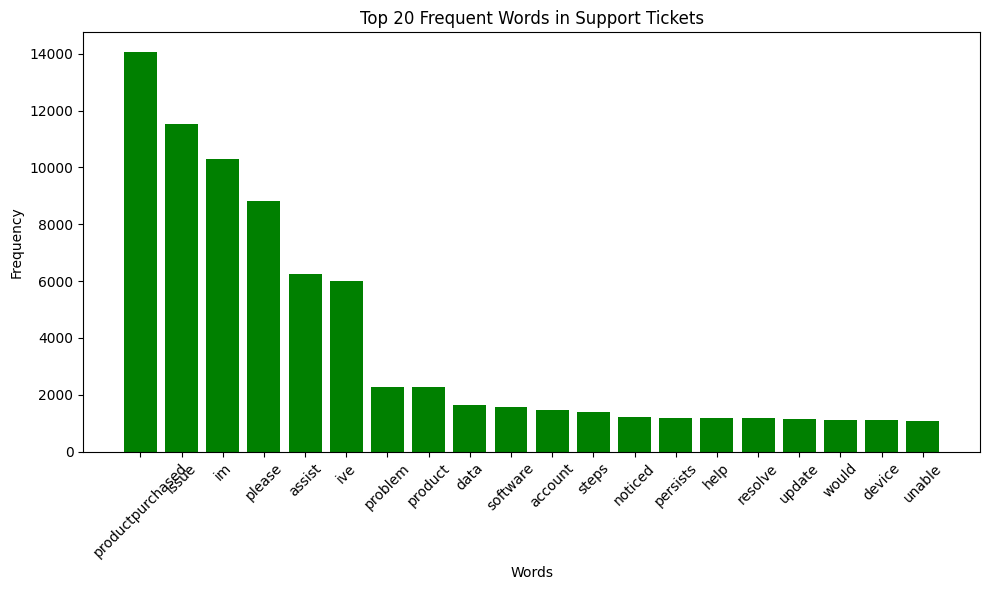

In [11]:
# Visualize Common Issues
import matplotlib.pyplot as plt

words, freqs = zip(*common_issues)
plt.figure(figsize=(10,6))
plt.bar(words, freqs, color='green')
plt.title('Top 20 Frequent Words in Support Tickets')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [12]:
# Group by Categories

if 'Category' in df.columns:
    df['Category'].value_counts().plot(kind='barh', title='Tickets per Category', figsize=(10, 5))


In [13]:
# Generate a Summary Report
summary = {
    "Total Tickets": len(df),
    "Most Common Words": common_issues,
    "Top Suggestions": [
        "Automate replies for frequent issues (e.g., password reset, login failure).",
        "Improve knowledge base articles based on frequent topics.",
        "Use categorization to assign tickets to specialized agents."
    ]
}

import pprint
pp = pprint.PrettyPrinter(indent=2)
pp.pprint(summary)


{ 'Most Common Words': [ ('productpurchased', 14048),
                         ('issue', 11530),
                         ('im', 10287),
                         ('please', 8807),
                         ('assist', 6250),
                         ('ive', 6001),
                         ('problem', 2285),
                         ('product', 2270),
                         ('data', 1654),
                         ('software', 1552),
                         ('account', 1461),
                         ('steps', 1390),
                         ('noticed', 1208),
                         ('persists', 1178),
                         ('help', 1176),
                         ('resolve', 1165),
                         ('update', 1155),
                         ('would', 1122),
                         ('device', 1106),
                         ('unable', 1088)],
  'Top Suggestions': [ 'Automate replies for frequent issues (e.g., password '
                       'reset, login failure).',
   